In [1]:
#Importing all the essential needed for logistic regression, plotting and confusion matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#creating our own data
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]


#Creating an instance of class LogisticRegression
#There are several optional parameter that define the behaviour of our model
#penalty - it is a string ('l2' by default) that decided whether there is regularization and which approach to use. other options are 'l1','elasticnet' and 'none'
#dual is a boolean (false by default) that decided whether to use primal(false) or dual formation(true)
#tol is a floating-point no that defines the tolerance for stopping the procedure
#c is a +ve floating-point number (1.0 by default) that defines the relative strength of regularization. smaller values indicate stronger regularization
#fit_intercept is a boolean(true by default) that decides whether to calculate the intercept b0 (when true) or consider it equal to zero(when false)
#intercept_scaling is a floating-point number (1.0 by default) that defines the scaling of the intercept b0
#class_weigth is a dictionary, 'balanced', or None(default) that defines the weights related to each class. when None, all classes ave the weight one
#random_state is an integer, an instance of numpy.RandomState, or None(default) that defines what pseudo-random number generator to use
#solver is a string('liblinear' by default) that decides what solver to use for fitting the model.Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.
#max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting
#multi_class is a string ('ovr' by default) that decided the approach to use for handling multiple classes. Other options are 'multinomial' and 'auto'
#verbose is a non-negative integer (0 by default) that defines the verbosity for the 'liblinear' and 'lbfgs' solvers
#warm_start is a Boolean (False by default) that decides whether to reuse the previously obtained solution
#n_jobs is an integer or None by default that defines the number of parallel processes to use. None means to use one core while -1 to use all available cores
#l1_ratio is either a floating-point number between zero and one or None(default). It defines the relative importance of the L1 part in the elastic-net regularization
#'liblinear' solver doesn’t work without regularization.
#'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization.
#'saga' is the only solver that supports elastic-net regularization.


In [8]:
#Now we will fit the model to determine the coefficients

model = LogisticRegression(solver='liblinear',random_state = 0).fit(x,y)

In [10]:
#the array of distinct values that y takes
print(model.classes_)

#the value of intercept b0
print(model.intercept_)

#the value of slope
print(model.coef_)

[0 1]
[-1.04608067]
[[0.51491375]]


In [13]:
#predict_prob returns the matrix of probabilities that the predicted output is zero or one (1-p(x), p(x))
print(model.predict_proba(x))

#we can get the acutal predictions by predict
print(model.predict(x))

[[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]]
[0 0 0 1 1 1 1 1 1 1]


In [14]:
#the accuracy of the model is 
print(model.score(x,y))

0.9


In [16]:
#confusion matrix, it takes actual output and predicted output as its input
#(true negative    false positive)
#(false negative    true positive)
print(confusion_matrix(y,model.predict(x)))

[[3 1]
 [0 6]]


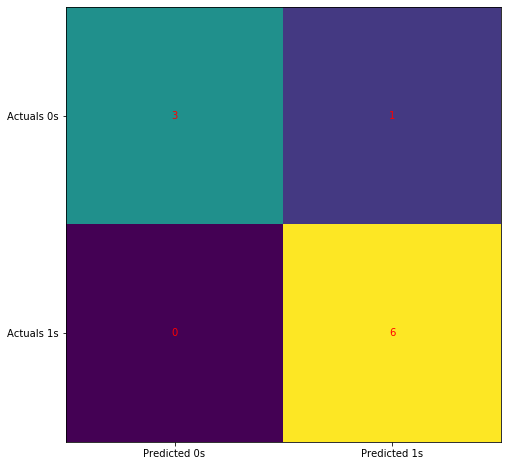

In [17]:
#visulization of the confusion matrix
cm = confusion_matrix(y, model.predict(x))

fig, ax =plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actuals 0s', 'Actuals 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center', va='center', color='red')
plt.show()

In [18]:
#to get more comprehensive report on classification 
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [19]:
#we can also improve our model by setting the regularization strength c = 10.0
model1 = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model1.fit(x,y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
print(model1.intercept_)
print(model1.coef_)
print(model1.predict_proba(x))
print(model1.predict(x))

[-3.51335372]
[[1.12066084]]
[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]
[0 0 0 0 1 1 1 1 1 1]


In [37]:
#lets change our y and see how well our model perform
y1 = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
model2 = LogisticRegression(solver = 'liblinear',C=10.0, random_state=0)
model2.fit(x,y1)

p_pred = model2.predict_proba(x)
y_pred = model2.predict(x)
score_ = model2.score(x,y1)
conf_m = confusion_matrix(y1,y_pred)
report = classification_report(y1,y_pred)

print('predicted probability', p_pred ,sep='\n', end='\n\n')
print('predicted y', y_pred, sep='\n', end='\n\n')
print('score_:', score_, end='\n\n')
print('confusion matrix:', conf_m, sep='\n',end='\n\n')
print('report:',report, sep='\n',end='\n\n')

predicted probability
[[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]

predicted y
[0 0 0 1 1 1 1 1 1 1]

score_: 0.8

confusion matrix:
[[2 1]
 [1 6]]

report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10




We have to keep in mind that logistic regression is essentially a linear classifier, so you theoretically can not make a logistic regression with an accuracy of 1 in this case.

Let's perform the logitc regression using the statsmodel

In [38]:
import statsmodels.api as sm

In [54]:
x = sm.add_constant(x)
y2 = np.array([0,1,0,0,1,1,1,1,1,1])

In [55]:
print(x)
print(y2)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
[0 1 0 0 1 1 1 1 1 1]


In [57]:
#creating a model 
model_sm = sm.Logit(y2,x)

In [58]:
#fitting the model. We can eith use fit or if we want to apply li regularization, then using fit.regularized()
result = model_sm.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7


In [59]:
print(result.params)

[-1.972805    0.82240094]


In [60]:
#evaluating our model
print(result.predict(x))

[0.12208792 0.24041529 0.41872657 0.62114189 0.78864861 0.89465521
 0.95080891 0.97777369 0.99011108 0.99563083]


In [68]:
print((result.predict(x) >= 0.5).astype(int))

[0 0 0 1 1 1 1 1 1 1]


In [69]:
#confusion matrix
print(result.pred_table())

[[2. 1.]
 [1. 6.]]


In [70]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 May 2020   Pseudo R-squ.:                  0.4263
Time:                        15:08:59   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                   0.02248
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9728      1.737     -1.136      0.256      -5.377       1.431
x1             0.8224      0.528      1.557      0.119      -0.213       1.858


In [72]:
print(result.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.426   
Dependent Variable: y                AIC:              11.0094 
Date:               2020-05-07 15:09 BIC:              11.6146 
No. Observations:   10               Log-Likelihood:   -3.5047 
Df Model:           1                LL-Null:          -6.1086 
Df Residuals:       8                LLR p-value:      0.022485
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
const    -1.9728     1.7366   -1.1360   0.2560   -5.3765   1.4309
x1        0.8224     0.5281    1.5572   0.1194   -0.2127   1.8575

